In [2]:
import pandas as pd

In [4]:
series = pd.read_csv('Data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [5]:
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64


In [6]:
print(series.size)

365


In [7]:
# Querying by time
# Accessing observations in January

print(series['1959-01'])

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Births, dtype: int64


In [9]:
# Calculate descriptive statistics
print(series.describe())

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64


## Basic feature engineering

In [10]:
# Work with minimum temperature dataset

series = pd.read_csv('Data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [11]:
# Building month and day features
dataframe = pd.DataFrame()

dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['temperature'] = [series[i] for i in range(len(series))]

print(dataframe.head())

   month  day  temperature
0      1    1         20.7
1      1    2         17.9
2      1    3         18.8
3      1    4         14.6
4      1    5         15.8


[TO ANSWER] What other feature could be useful to predict temperature? 

### Lag features

In [14]:
# Use shift() function in pandas with lag=1
temps = pd.DataFrame(series.values)
dataframe = pd.concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head())

      t   t+1
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8


In [16]:
# Use the last 3 values to predict the 4th
temps = pd.DataFrame(series.values)
dataframe = pd.concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1) 
dataframe.columns = ['t-2', 't-1', 't', 't+1']
print(dataframe.head())

    t-2   t-1     t   t+1
0   NaN   NaN   NaN  20.7
1   NaN   NaN  20.7  17.9
2   NaN  20.7  17.9  18.8
3  20.7  17.9  18.8  14.6
4  17.9  18.8  14.6  15.8


### Rolling window statistics

A step beyond adding raw lagged values is to add a summary of the values at previous time steps. We can calculate summary statistics across the values in the sliding window and include these as features in our dataset. Perhaps the most useful is the mean of the previous few values, also called the rolling mean. Pandas provides a rolling() function that creates a new data structure with the window of values at each time step. We can then perform statistical functions on the window of values collected for each time step, such as calculating the mean.

In [18]:
temps = pd.DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = pd.concat([means, temps], axis=1) 
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head())

   mean(t-1,t)   t+1
0          NaN  20.7
1          NaN  17.9
2        19.30  18.8
3        18.35  14.6
4        16.70  15.8


In [23]:
temps = pd.DataFrame(series.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps], axis=1) 
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head())

    min       mean   max   t+1
0   NaN        NaN   NaN  20.7
1   NaN        NaN   NaN  17.9
2   NaN        NaN   NaN  18.8
3   NaN        NaN   NaN  14.6
4  17.9  19.133333  20.7  15.8


### Expanding window statistics

Like the rolling() function on DataFrame, Pandas provides an expanding() function that collects sets of all prior values for each time step.

Below is an example of calculating the minimum, mean, and maximum values of the expanding window on the daily temperature dataset.

In [24]:
temps = pd.DataFrame(series.values)
window = temps.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1) 
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head())

    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8


## Visualization

### Line plot

In [25]:
from matplotlib import pyplot as plt

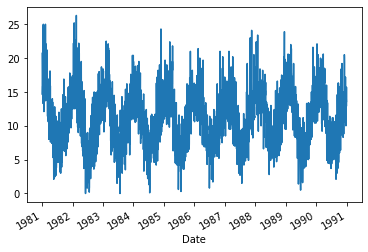

In [26]:
series.plot()
plt.show()

The line plot is quite dense. Sometimes it can help to change the style of the line plot; for example, to use a dashed line or dots. Below is an example of changing the style of the line to be black dots instead of a connected line (the style=’k.’ argument). We could change this example to use a dashed line by setting style to be ’k--’.

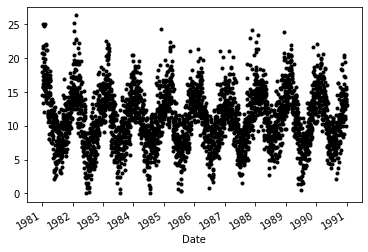

In [27]:
series.plot(style='k.') 
plt.show()

It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year. The Minimum Daily Temperatures dataset spans 10 years. We can group data by year and create a line plot for each year for direct compari- son. The example below shows how to do this. First the observations are grouped by year (series.groupby(Grouper(freq=’A’))).

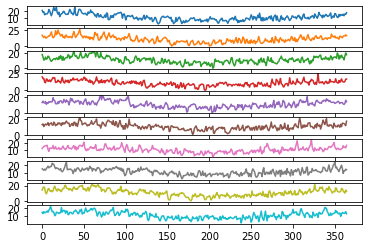

In [28]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years.plot(subplots=True, legend=False)
plt.show()

### Histogram and density plots

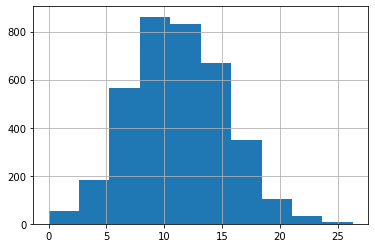

In [29]:
series.hist()
plt.show()

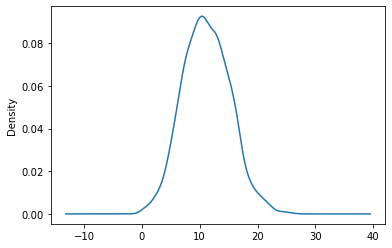

In [30]:
series.plot(kind='kde') 
plt.show()

Seeing a distribution like this may suggest later exploring statistical hypothesis tests to formally check if the distribution is Gaussian and perhaps data preparation techniques to reshape the distribution, like the Box-Cox transform.

### Box and Whisker Plots by Interval

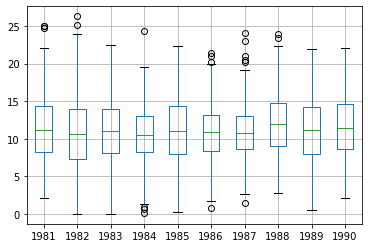

In [32]:
groups = series.groupby(pd.Grouper(freq='A')) 
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values
years.boxplot()
plt.show()

We may also be interested in the distribution of values across months within a year. The example below creates 12 box and whisker plots, one for each month of 1990, the last year in the dataset.

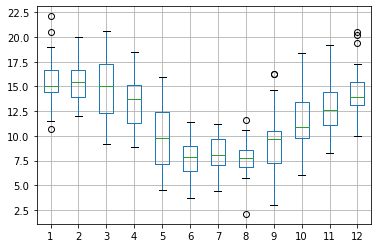

In [33]:
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1) 
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot()
plt.show()

### Heat Maps

Below is an example of creating a heatmap of the Minimum Daily Temperatures data. The matshow() function from the Matplotlib library is used as no heatmap support is provided directly in Pandas. For convenience, the matrix is rotated (transposed) so that each row represents one year and each column one day. This provides a more intuitive, left-to-right layout of the data.

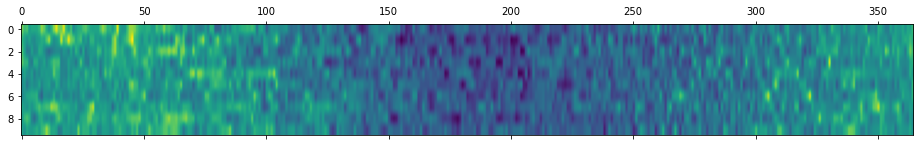

In [34]:
groups = series.groupby(pd.Grouper(freq='A')) 
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
plt.matshow(years, interpolation=None, aspect='auto') 
plt.show()

As with the box and whisker plot example above, we can also compare the months within a year. Below is an example of a heat map comparing the months of the year in 1990. Each column represents one month, with rows representing the days of the month from 1 to 31.

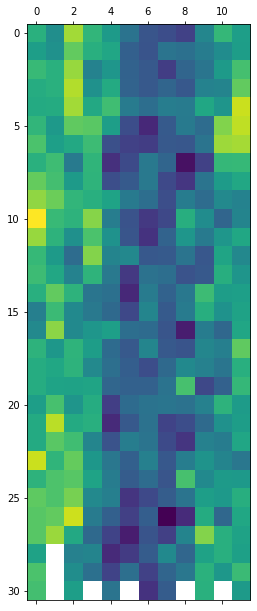

In [35]:
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1) 
months = pd.DataFrame(months)
months.columns = range(1,13)
plt.matshow(months, interpolation=None, aspect='auto') 
plt.show()

### Lag Scatter Plot


Time series modeling assumes a relationship between an observation and the previous observation. Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag=2, and so on. A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot. Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the observation at the next time step (t+1) on the y-axis.

- If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
- If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
- Either relationship is good as they can be modeled.

More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship. A ball in the middle or a spread across the plot suggests a weak or no relationship.

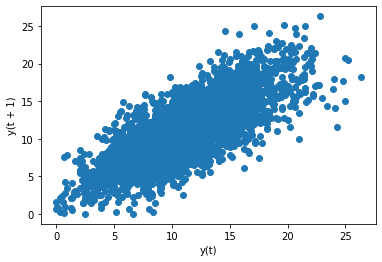

In [37]:
from pandas.plotting import lag_plot

lag_plot(series)
plt.show()

The plot created from running the example shows a relatively strong positive correlation between observations and their lag1 values.

We can repeat this process for an observation and any lag values. Perhaps with the observation at the same time last week, last month, or last year, or any other domain-specific knowledge we may wish to explore. For example, we can create a scatter plot for the observation with each value in the previous seven days.

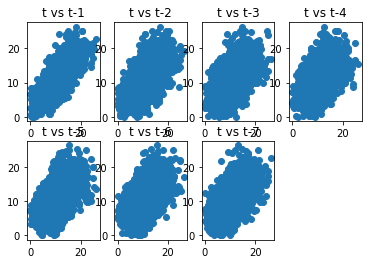

In [38]:
values = pd.DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1) 
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i)) 
dataframe.columns = columns 
plt.figure(1)
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
plt.show()

Running the example suggests the strongest relationship between an observation with its lag=1 value, but generally a good positive correlation with each value in the last week.

### Autocorrelation plots

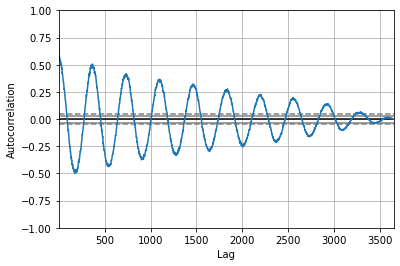

In [39]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.show()

he resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful). We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen in this example are a strong sign of seasonality in the dataset.